In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('Big_Black_Money_Dataset (2).csv')

# Identify unique risk score categories (High, Medium, Low)
risk_categories = data['Money Laundering Risk Score'].dropna().unique()



In [8]:
risk_categories = data['Money Laundering Risk Score'].dropna().unique()


Processing Money Laundering Risk Score: Medium
Number of records for Medium Risk: 1754
k = 2: sil_sco = 0.2347, DB_sco = 1.6504
k = 3: sil_sco = 0.2148, DB_sco = 1.3201
k = 4: sil_sco = 0.2281, DB_sco = 1.3136
k = 5: sil_sco = 0.2201, DB_sco = 1.2325
k = 6: sil_sco = 0.2093, DB_sco = 1.1874
k = 7: sil_sco = 0.2020, DB_sco = 1.1482
k = 8: sil_sco = 0.2044, DB_sco = 1.1117
k = 9: sil_sco = 0.2102, DB_sco = 1.1205
k = 10: sil_sco = 0.2137, DB_sco = 1.1262

Best k for Medium Risk (sil_sco): 2
Best k for Medium Risk (DB_sco): 8

Selected Best k for Medium Risk: 8 using Davies-Bouldin Score


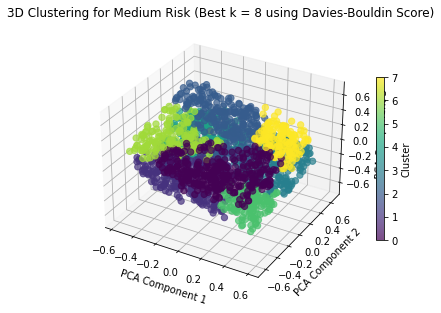


Processing Money Laundering Risk Score: High
Number of records for High Risk: 1415
k = 2: sil_sco = 0.2290, DB_sco = 1.6729
k = 3: sil_sco = 0.2089, DB_sco = 1.3538
k = 4: sil_sco = 0.2383, DB_sco = 1.2951
k = 5: sil_sco = 0.2227, DB_sco = 1.1554
k = 6: sil_sco = 0.2179, DB_sco = 1.0490
k = 7: sil_sco = 0.2260, DB_sco = 1.0429
k = 8: sil_sco = 0.2285, DB_sco = 1.1309
k = 9: sil_sco = 0.2250, DB_sco = 1.1362
k = 10: sil_sco = 0.2336, DB_sco = 1.1429

Best k for High Risk (sil_sco): 4
Best k for High Risk (DB_sco): 7

Selected Best k for High Risk: 7 using Davies-Bouldin Score


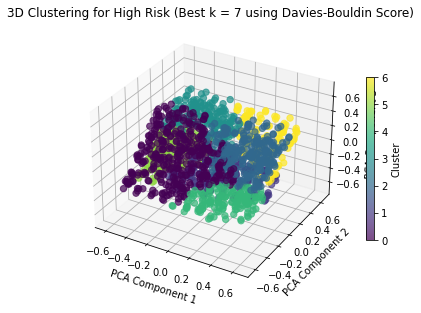


Processing Money Laundering Risk Score: Low
Number of records for Low Risk: 1340
k = 2: sil_sco = 0.2335, DB_sco = 1.6012
k = 3: sil_sco = 0.2005, DB_sco = 1.5200
k = 4: sil_sco = 0.1904, DB_sco = 1.2439
k = 5: sil_sco = 0.2057, DB_sco = 1.2631
k = 6: sil_sco = 0.2165, DB_sco = 1.1150
k = 7: sil_sco = 0.2179, DB_sco = 1.1129
k = 8: sil_sco = 0.2013, DB_sco = 1.0757
k = 9: sil_sco = 0.2031, DB_sco = 1.1715
k = 10: sil_sco = 0.2035, DB_sco = 1.2392

Best k for Low Risk (sil_sco): 2
Best k for Low Risk (DB_sco): 8

Selected Best k for Low Risk: 8 using Davies-Bouldin Score


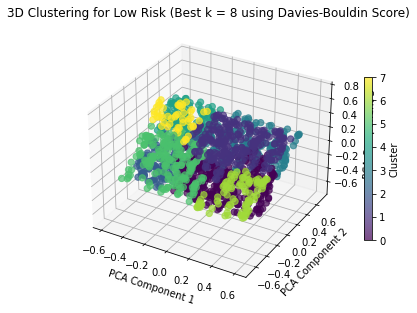

In [9]:
# Iterate through each risk category and perform Hierarchical clustering
for risk_category in risk_categories:
    print(f"\nProcessing Money Laundering Risk Score: {risk_category}")

    # Filter the dataset for the current risk category
    filtered_data = data[data['Money Laundering Risk Score'] == risk_category]

    # Print the number of rows for this category
    print(f"Number of records for {risk_category} Risk: {len(filtered_data)}")

    # Select numerical features
    features = filtered_data[['Amount (USD)', 'Shell Companies Involved', 'Person Involved']].select_dtypes(include=['number'])

    # Skip if there is not enough data for clustering
    if features.shape[0] < 2:
        print(f"Not enough data for clustering in category: {risk_category}")
        continue

    # Normalize the data using Min-Max Scaling
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(features)

    # Apply PCA to reduce dimensionality to 3 components for visualization
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(normalized_data)

    # Initialize variables to store the best k and metrics
    sil_sco_list = []
    DB_sco_list = []
    best_k_sil_sco = None
    best_k_DB_sco = None
    best_sil_sco = -1
    best_DB_sco = float('inf')

    # Iterate over different values of k (number of clusters) to find the best k
    for k in range(2, 11):  # Testing k from 2 to 10
        clustering = AgglomerativeClustering(n_clusters=k)
        labels = clustering.fit_predict(reduced_data)

        # Calculate Silhouette Score
        sil_sco = silhouette_score(reduced_data, labels)
        sil_sco_list.append(sil_sco)

        # Calculate Davies-Bouldin Score
        DB_sco = davies_bouldin_score(reduced_data, labels)
        DB_sco_list.append(DB_sco)

        # Print metrics for the current k
        print(f"k = {k}: sil_sco = {sil_sco:.4f}, DB_sco = {DB_sco:.4f}")

        # Track the best k for Silhouette Score
        if sil_sco > best_sil_sco:
            best_sil_sco = sil_sco
            best_k_sil_sco = k

        # Track the best k for Davies-Bouldin Score
        if DB_sco < best_DB_sco:
            best_DB_sco = DB_sco
            best_k_DB_sco = k

    # Print the best k values for the current risk category
    print(f"\nBest k for {risk_category} Risk (sil_sco): {best_k_sil_sco}")
    print(f"Best k for {risk_category} Risk (DB_sco): {best_k_DB_sco}")

    # Select the best method based on scores
    if best_sil_sco > (1 / best_DB_sco):
        best_k = best_k_sil_sco
        best_method = "Silhouette Score"
    else:
        best_k = best_k_DB_sco
        best_method = "Davies-Bouldin Score"

    print(f"\nSelected Best k for {risk_category} Risk: {best_k} using {best_method}")

    # Plot 3D visualization for the selected best k
    clustering = AgglomerativeClustering(n_clusters=best_k)
    labels = clustering.fit_predict(reduced_data)

    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2],
        c=labels, cmap='viridis', s=40, alpha=0.7
    )

    ax.set_title(f"3D Clustering for {risk_category} Risk (Best k = {best_k} using {best_method})", fontsize=12)
    ax.set_xlabel("PCA Component 1")
    ax.set_ylabel("PCA Component 2")
    ax.set_zlabel("PCA Component 3")

    # Add legend
    legend = fig.colorbar(scatter, ax=ax, shrink=0.6)
    legend.set_label("Cluster")
    plt.show()